In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style='text-align:center;'>Inequalities in Directed Networks</h1>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs import ranking
from org.gesis.libs.utils import printf

from org.gesis.libs.network import load_all_node_metadata_empirical
from org.gesis.libs.network import load_all_node_metadata_synthetic

<h2>Constants</h2>

In [4]:
DATASETS = ['aps','github','pokec','wikipedia'] #'twitter'
MODELS = ['DH', 'DBA', 'DHBA']
ROOT = '../data/'
PLOTS = '../plots/'
OUTPUT = "../results-batch/"

<h2>Evidence from Empirical Networks</h2>

In [5]:
fn = os.path.join(OUTPUT, 'summary_datasets.csv')
df_summary = io.read_csv(fn)
df_summary

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,EMm,density,gammaM,kminM,gammam,kminm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.38,3638,0.294,0.650,...,0.029,0.00106,2.880254,4.0,5.020234,5.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,Github,296612,6965,gender,female,male,0.06,1723930,0.005,0.899,...,0.051,0.00002,2.847932,60.0,2.661940,21.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
2,Pokec,1632636,1,gender,1,0,0.49,30622117,0.195,0.250,...,0.248,0.00001,4.506221,131.0,3.850320,109.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
3,Wikipedia,3159,66,gender,female,male,0.15,14890,0.030,0.785,...,0.078,0.00149,3.647207,17.0,2.435874,5.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


In [6]:
df_metadata = load_all_node_metadata_empirical(DATASETS, ROOT)
#df_metadata.sample(5)

In [7]:
df_rank_empirical = ranking.rank_empirical(ROOT, df_summary.dataset.unique(), OUTPUT)
#df_rank_empirical.sample(5)

<h3>Vertical and Horizontal inequalities</h3>

../plots/vh_inequalities_empirical.pdf saved!


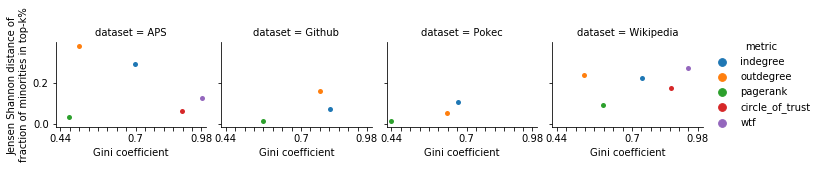

In [8]:
fn = os.path.join(PLOTS, 'vh_inequalities_empirical.pdf')
viz.plot_vh_inequalities_empirical(df_rank_empirical, fn=fn)

<h3>Inequalities per dataset</h3>

['aps', 'github', 'pokec', 'wikipedia']
../plots/vh_inequalities_aps.pdf saved!


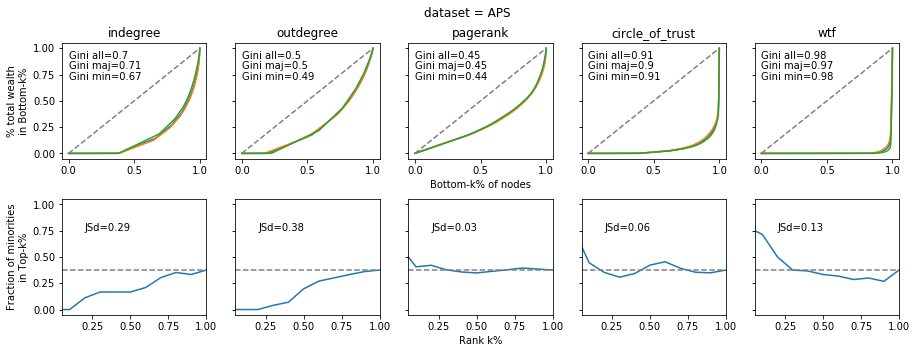

In [9]:
print(DATASETS)
dataset = DATASETS[0] # from 0 to 3
fn = os.path.join(PLOTS, 'vh_inequalities_{}.pdf'.format(dataset))
viz.plot_vertical_and_horizontal_inequalities_per_dataset(df_metadata, df_rank_empirical, df_summary, dataset, fn)

<h3>Best ranking metric per dataset</h3>
<p>As shortest Jensen Shannon distance</p>

In [10]:
df_JS = ranking.JS_divergence_empirical(df_rank_empirical, df_summary)
df_best = ranking.best_ranking_empirical(df_JS)
df_best

,dataset,distance,metric,pvalue
0,APS,0.034585,pagerank,NaN
1,Github,0.017314,pagerank,NaN
2,Pokec,0.015684,pagerank,NaN
3,Wikipedia,0.091937,pagerank,NaN


../plots/horizontal_inequality_empirical_pagerank.pdf saved!


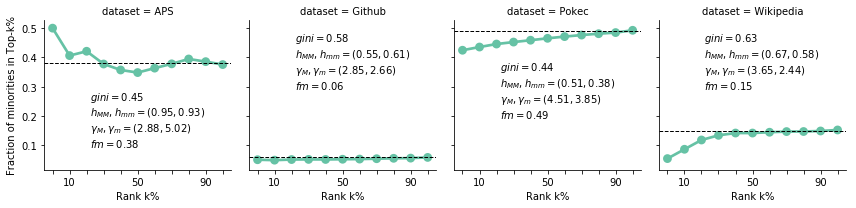

In [11]:
BESTMETRIC = 'pagerank'
fn = os.path.join(PLOTS, 'horizontal_inequality_empirical_{}.pdf'.format(BESTMETRIC))
viz.plot_empirical_rankings(df_rank_empirical.query("metric==@BESTMETRIC"), df_summary, df_metadata=df_metadata, fn=fn)

<h3>Worst ranking metric per dataset</h3>
<p>As longest Jensen Shannon distance</p>

In [12]:
tmp = ranking.JS_divergence_empirical(df_rank_empirical, df_summary)
df_worst = ranking.worst_ranking_empirical(tmp)
df_worst

,dataset,distance,metric,pvalue
0,APS,0.378607,outdegree,NaN
1,Github,0.159280,outdegree,NaN
2,Pokec,0.108060,indegree,NaN
3,Wikipedia,0.269844,wtf,NaN


../plots/horizontal_inequality_empirical_worst_cases.pdf saved!


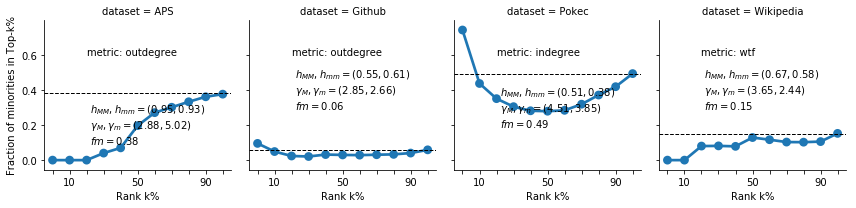

In [13]:
fn = os.path.join(PLOTS, 'horizontal_inequality_empirical_worst_cases.pdf')
tmp = df_rank_empirical.query("(dataset.str.lower() in ['aps','github'] & metric == 'outdegree') | (dataset.str.lower() in ['pokec'] & metric == 'indegree') | (dataset.str.lower() in ['wikipedia'] & metric == 'wtf')")
viz.plot_empirical_rankings(tmp, df_summary, hue=None, df_metadata=df_metadata, fn=fn)

<h2>Model-Fit: Modelling underlying link mechanisms</h2>

In [14]:
df_rank_fit = ranking.rank_fit(df_summary.dataset.unique(), OUTPUT)
#df_rank_fit.head()   

In [15]:
df_rank = df_rank_empirical.copy()
df_rank = df_rank.append(df_rank_fit.copy())
#df_rank.sample(5)

../plots/horizontal_inequality_fit_pagerank.pdf saved!


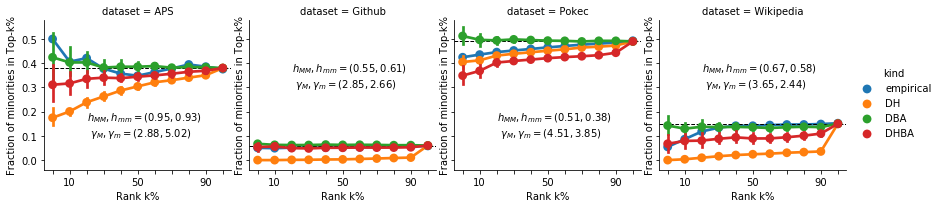

In [16]:
fn = os.path.join(PLOTS, 'horizontal_inequality_fit_{}.pdf'.format(BESTMETRIC))
viz.plot_model_fit(df_rank, df_summary, metric=BESTMETRIC, fn=fn)

<h3>Best model per dataset</h3>

In [17]:
df_JS_fit = ranking.JS_divergence_fit(df_rank)
df_best_fit = ranking.best_ranking_fit(df_JS_fit)
df_best_fit[[BESTMETRIC]]

metric,pagerank
dataset,
APS,DBA
Github,DHBA
Pokec,DH
Wikipedia,DHBA


<h2>Synthetic</h2>

<h3>DHBA: Directed + Homophilic + Barabasi Albert Networks</h3>

In [18]:
model = 'DHBA'
metric = 'pagerank'

In [19]:
df_rank_synthetic_all = ranking.rank_vh_inequalities_synthetic(model, OUTPUT)
df_rank_synthetic_metric = df_rank_synthetic_all.query("metric==@metric").copy()
#df_rank_synthetic_all.sample(5)

../plots/horizontal_inequality_pagerank_synthetic_DHBA_sym.pdf saved!


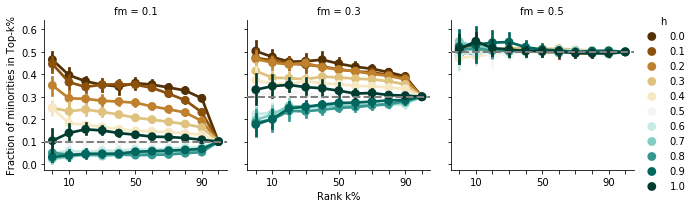

In [20]:
fn = os.path.join(PLOTS, 'horizontal_inequality_{}_synthetic_{}_sym.pdf'.format(metric,model))
viz.plot_synthetic_rankings(df_rank_synthetic_metric, sym=True, fn=fn)

../plots/horizontal_inequality_pagerank_synthetic_DHBA_asym.pdf saved!


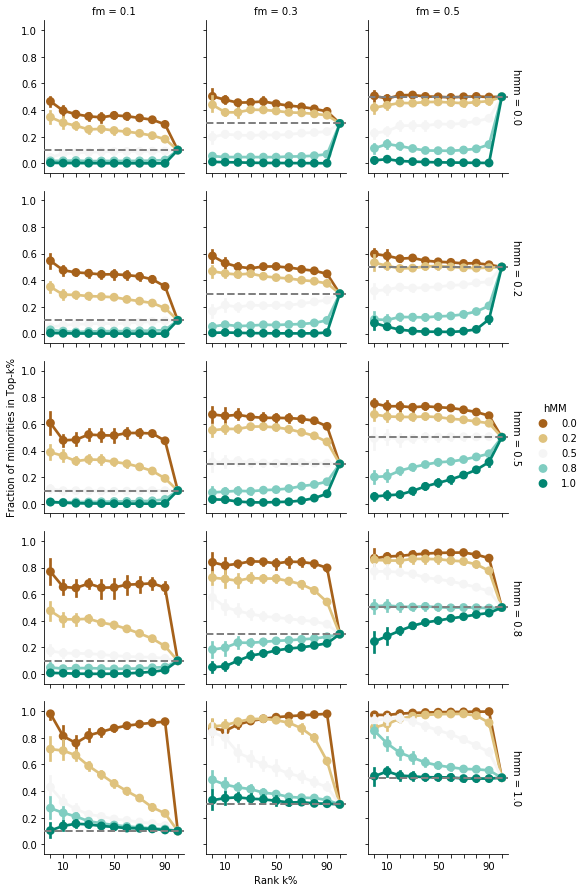

In [21]:
fn = os.path.join(PLOTS, 'horizontal_inequality_{}_synthetic_{}_asym.pdf'.format(metric,model))
viz.plot_synthetic_rankings(df_rank_synthetic_metric, sym=False, fn=fn)

<h3>Vertical and Horizontal inequalities</h3>

../plots/vh_inequalities_pagerank_synthetic_DHBA_sym.pdf saved!


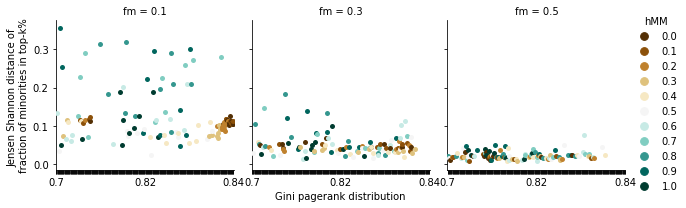

In [22]:
fn = os.path.join(PLOTS, 'vh_inequalities_{}_synthetic_{}_sym.pdf'.format(metric,model))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic_metric, sym=True, fn=fn)

../plots/vh_inequalities_pagerank_synthetic_DHBA_asym.pdf saved!


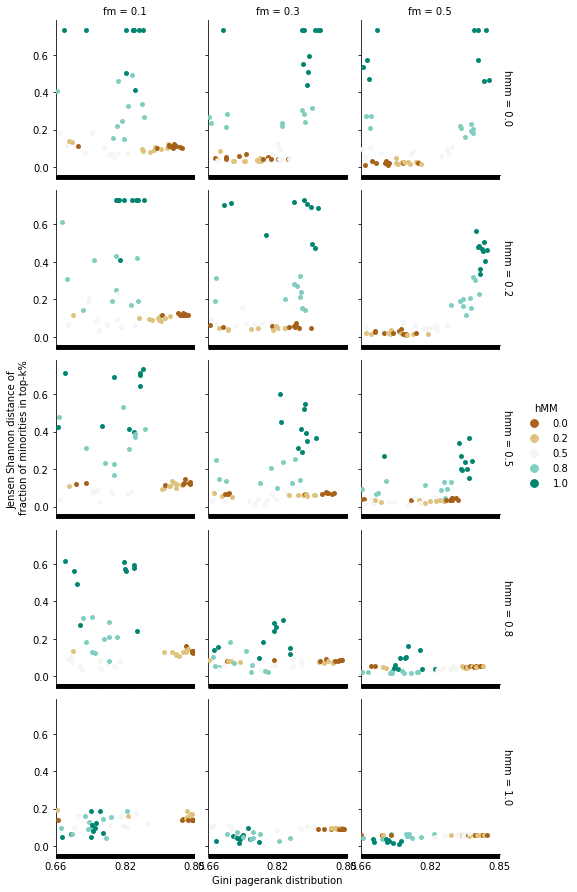

In [23]:
fn = os.path.join(PLOTS, 'vh_inequalities_{}_synthetic_{}_asym.pdf'.format(metric,model))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic_metric, sym=False, fn=fn)

<h2>Other models</h2>

<h3>DH: Directed + Homophilic Networks</h3>

In [24]:
model = 'DH'

<h3>DBA: Directed + Barabasi Albert Networks</h3>
<p style='color:blue;'>Since this model does not depend on homophily (hmm=hMM=0.5), the fraction of minorities in top-k% will always be fm. Thus, always FAIR</p>